In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset to python environment
data=pd.read_excel(r"C:\Users\HP\Downloads\iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#  Pre-processing

In [5]:
data.shape

(150, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe() #Five number summary 

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Handdling missing value
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
#Filling the missing value:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [14]:
num_col=data[['SL', 'SW', 'PL', 'PW']]
num_col.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,NaN,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
num_col.isna().sum()

SL    7
SW    6
PL    6
PW    0
dtype: int64

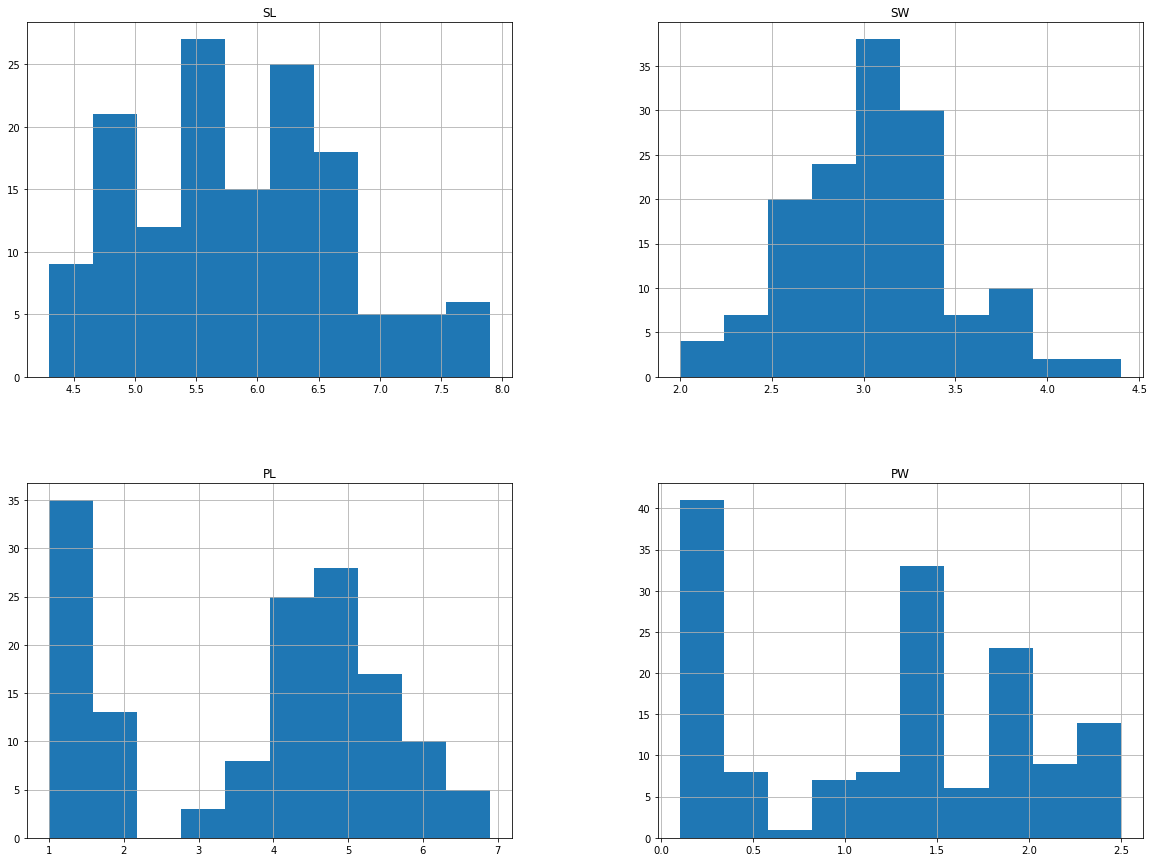

In [16]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [17]:
#So we will be using median since all the data are skew except 'SW'

In [18]:
for col in ['SL', 'SW', 'PL', 'PW']:
    data[col] = data[col].fillna(data[col].median())

In [19]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Managing Outliers 

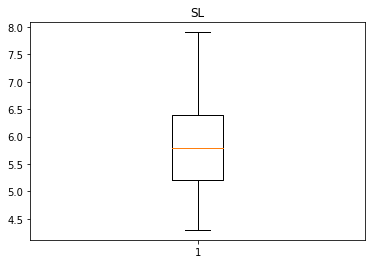

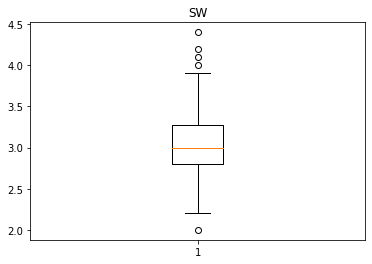

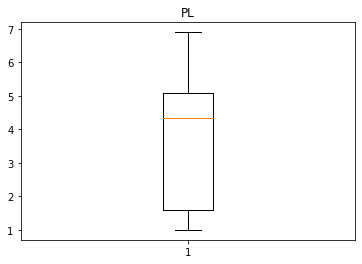

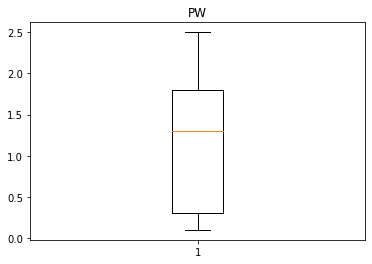

In [21]:
#Using boxplot:

for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [22]:
#From the above boxplots we can identify that only column 'SW' das outliers.
#Handling outliers:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)#Median
print(Q3)

2.8
3.0
3.25


In [23]:
IQR=Q3-Q1

In [25]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)

In [27]:
outlier = []
for x in data['SW']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

In [28]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [29]:
#Finding the index value of the outliers:
ind1=data['SW']<low_lim
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [30]:
ind1=data['SW']>up_lim
data.loc[ind1].index 

Int64Index([14, 15, 32, 33], dtype='int64')

In [33]:
#Droping those rows:
data.drop([14, 15, 32, 33, 60],inplace=True)

In [39]:
data.head(17)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Label Encoding

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

y = data['Classification']
x=data.drop(['Classification'],axis=1)

# knn

In [47]:
le = LabelEncoder()
data['Classification'] = le.fit_transform(data['Classification'])

y = data['Classification']
x=data.drop(['Classification'],axis=1)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
metric_k = []
neighbors = np.arange(3,15)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

for k in neighbors:
    classifier = KNeighborsClassifier (n_neighbors=k, metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_k = model.predict(x_test)
    acc = accuracy_score (y_test,y_pred_k)
    metric_k.append(acc)

In [50]:
print('Accuracy = ',accuracy_score(y_test,y_pred_k))
print('Precision = ',precision_score(y_test,y_pred_k, average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_k, average='weighted'))
print('F1_score = ',f1_score(y_test,y_pred_k, average='weighted'))

Accuracy =  0.8648648648648649
Precision =  0.8873873873873872
Recall =  0.8648648648648649
F1_score =  0.86985886985887


# LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
model = clf.fit(x_train,y_train)

In [52]:
y_pred_lg = model.predict(x_test)

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

print('Accuracy = ',accuracy_score(y_test,y_pred_lg))
print('Precision = ',precision_score(y_test,y_pred_lg, average='weighted'))
print('Recall = ',recall_score(y_test,y_pred_lg, average='weighted'))
print('F1_score = ',f1_score(y_test,y_pred_lg, average='weighted'))

Accuracy =  0.8918918918918919
Precision =  0.9045549045549045
Recall =  0.8918918918918919
F1_score =  0.8952952952952953


# Decsion tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred_dt = dt_clf.predict(x_test)

In [56]:
print('accuracy = ',accuracy_score (y_test,y_pred_dt))

accuracy =  0.918918918918919


In [57]:
print(confusion_matrix (y_test,y_pred_dt))

[[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]


# SVM

In [63]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)


SVC(kernel='linear')

In [61]:
y_pred_svm_lin = svmclf.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix 
acc_svm_lin = accuracy_score (y_test,y_pred_svm_lin)
print('Accuracy for SVM = ',acc_svm_lin) 
print('Precision for SVM = ', precision_score (y_test,y_pred_svm_lin, average='micro'))
print('Recall for SVM = ',recall_score (y_test,y_pred_svm_lin, average='micro'))
print('f1 score for SVM=',f1_score (y_test,y_pred_svm_lin, average='micro')) 
print('Confusion matrix\n', confusion_matrix (y_test,y_pred_svm_lin))

Accuracy for SVM =  0.918918918918919
Precision for SVM =  0.918918918918919
Recall for SVM =  0.918918918918919
f1 score for SVM= 0.918918918918919
Confusion matrix
 [[14  0  0]
 [ 0  8  1]
 [ 0  2 12]]
